## Plot mean energy spectra and TOL for beluga and narwhal clicks

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Load Data

In [2]:
# import beluga and narwhal sound pressure level (SPL) statistics
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/TOL_ratios/'

# 2013 training dataset
disk_spec_0kHz = pd.read_csv(csv_dir + 'training_data_TOL_ratios.csv')
# Kong Oscar
kong_spec_0kHz  = pd.read_csv(csv_dir + 'testing_kong_data_TOL_ratios_0kHz_highpass.csv')
# Fisher Islands
fish_spec_0kHz  = pd.read_csv(csv_dir + 'testing_fish_data_TOL_ratios_0kHz_highpass.csv')

# join dataframes from both sites
soundtrap_spec_0kHz  = pd.concat([kong_spec_0kHz, fish_spec_0kHz])

In [3]:
## separate beluga and narwhal data
## 2013 data
narwhal_2013_spec_0kHz = disk_spec_0kHz[disk_spec_0kHz.species==85]
beluga_2013_spec_0kHz  = disk_spec_0kHz[disk_spec_0kHz.species==45]

## 0 kHz highpass
narwhal_spec_0kHz = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X085"]
beluga_spec_0kHz  = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X045"]

In [4]:
## select only TOL calculations
narwhal_reson_spec = narwhal_2013_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]
beluga_reson_spec = beluga_2013_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]

narwhal_soundtrap_spec = narwhal_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]
beluga_soundtrap_spec = beluga_spec_0kHz[["eventId","TOL_16to25_mean_dB","TOL_25to40_mean_dB",\
                                             "TOL_16to25_sum_dB","TOL_25to40_sum_dB"]]

### Compute mean and median of TOL ratios

In [5]:
def calculate_mean_median_spl_diff(spec_df):
    # convert to linear scale
    spl_diff = spec_df.iloc[:,1:3]
    
    # convert to linear scale and calculate mean across all events (rows)
    spl_diff_mean_linear = (10**(spl_diff/20)).mean(axis=0)
    # convert back to dB (log scale)
    spl_diff_mean_dB = 20*np.log10(spl_diff_mean_linear)
    
    print('mean:')
    print(spl_diff_mean_dB,'\n')
    print('median:')
    print(spl_diff.median())

Reson mean and median

In [6]:
calculate_mean_median_spl_diff(narwhal_reson_spec)

mean:
TOL_16to25_mean_dB    20.383509
TOL_25to40_mean_dB     4.490224
dtype: float64 

median:
TOL_16to25_mean_dB    18.088380
TOL_25to40_mean_dB     4.276034
dtype: float64


In [7]:
calculate_mean_median_spl_diff(beluga_reson_spec)

mean:
TOL_16to25_mean_dB     4.441957
TOL_25to40_mean_dB    20.592079
dtype: float64 

median:
TOL_16to25_mean_dB     2.433445
TOL_25to40_mean_dB    19.905248
dtype: float64


SoundTrap mean and median

In [8]:
calculate_mean_median_spl_diff(narwhal_soundtrap_spec)

mean:
TOL_16to25_mean_dB    7.792511
TOL_25to40_mean_dB   -2.066513
dtype: float64 

median:
TOL_16to25_mean_dB    4.841380
TOL_25to40_mean_dB   -2.373651
dtype: float64


In [9]:
calculate_mean_median_spl_diff(beluga_soundtrap_spec)

mean:
TOL_16to25_mean_dB   -4.585783
TOL_25to40_mean_dB    9.916218
dtype: float64 

median:
TOL_16to25_mean_dB   -4.965000
TOL_25to40_mean_dB    8.400497
dtype: float64


Load noise spectra

In [10]:
## load noise spectra
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/noise_spec/'

# 2013 training dataset
reson_noise_spec_df = pd.read_csv(csv_dir + 'reson_avg_noise_spec.csv')
narwhal_reson_noise_spec = reson_noise_spec_df[reson_noise_spec_df.species==85]
beluga_reson_noise_spec  = reson_noise_spec_df[reson_noise_spec_df.species==45]

# Kong Oscar
kong_noise_spec_0kHz  = pd.read_csv(csv_dir + 'kong_avg_noise_spec.csv')
# Fisher Islands
fish_noise_spec_0kHz  = pd.read_csv(csv_dir + 'fish_avg_noise_spec.csv')
# join dataframes from both sites
soundtrap_noise_spec  = pd.concat([kong_noise_spec_0kHz, fish_noise_spec_0kHz])
# separate species
narwhal_ST_noise_spec = soundtrap_noise_spec[soundtrap_noise_spec.species=="X085"]
beluga_ST_noise_spec  = soundtrap_noise_spec[soundtrap_noise_spec.species=="X045"]

In [11]:
# many of the beluga events don't have an accurate noise floor measurement
# need to subset the valid ones
beluga_events_noise = [1713,1714,1716,1758,1789,1967,4841,5007,5031]
beluga_ST_noise_spec_valid = beluga_ST_noise_spec.loc[beluga_ST_noise_spec['eventId'].isin(beluga_events_noise)]

### Prepare TOL dataframes for violin plots

#### mean TOL

In [12]:
## prepare dataframes to plot violin plots

## 2013 dataset
df_narwhal_reson_mean = pd.melt(narwhal_reson_spec, id_vars='eventId',\
                                value_vars=narwhal_reson_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                                var_name='band', value_name='dB')

df_beluga_reson_mean = pd.melt(beluga_reson_spec, id_vars='eventId',\
                               value_vars=beluga_reson_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                               var_name='band', value_name='dB')

## 0 kHz highpass
df_narwhal_ST_mean = pd.melt(narwhal_soundtrap_spec, id_vars='eventId',\
                             value_vars=narwhal_soundtrap_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                             var_name='band', value_name='dB')

df_beluga_ST_mean = pd.melt(beluga_soundtrap_spec, id_vars='eventId',\
                            value_vars=beluga_soundtrap_spec.loc[:,'TOL_16to25_mean_dB':'TOL_25to40_mean_dB'],\
                            var_name='band', value_name='dB')

#### sum TOL

In [13]:
## prepare dataframes to plot violin plots

## 2013 dataset
df_narwhal_reson_sum = pd.melt(narwhal_reson_spec, id_vars='eventId',\
                               value_vars=narwhal_reson_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                               var_name='band', value_name='dB')

df_beluga_reson_sum = pd.melt(beluga_reson_spec, id_vars='eventId',\
                              value_vars=beluga_reson_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                              var_name='band', value_name='dB')

## 0 kHz highpass
df_narwhal_ST_sum = pd.melt(narwhal_soundtrap_spec, id_vars='eventId',\
                            value_vars=narwhal_soundtrap_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                            var_name='band', value_name='dB')

df_beluga_ST_sum = pd.melt(beluga_soundtrap_spec, id_vars='eventId',\
                           value_vars=beluga_soundtrap_spec.loc[:,'TOL_16to25_sum_dB':'TOL_25to40_sum_dB'],\
                           var_name='band', value_name='dB')

### Calculate average spectra for each group across events

In [14]:
def calculate_avg_spec(spec_df):
    # convert to linear scale and calculate mean across all events (rows)
    avSpec_all_linear = (10**(spec_df/20)).mean(axis=0)
    # convert back to dB (log scale)
    avSpec_all = 20*np.log10(avSpec_all_linear)
    return(avSpec_all)

In [15]:
# PAMpal applies an energy correction to compensate for the Hanning window removing energy. 
# We don't want this correction, so we need to remove it (i.e., correction for the correction)
# We also want to calculate power spectral density (PSD) so need to divide by the FFT window size
N = 512 # FFT window size
fs = 144000 # sampling rate
window = np.hanning(N) # hanning window applied to waveform
correction = 10*np.log10(sum(window)**2/(N*fs))


freq_array_reson = np.arange(0,(250000+250000/256),250000/256)[1:]
freq_array_soundtrap = np.arange(0,(72000+72000/256),(72000/256))[1:]
freq_array_soundtrap_256 = np.arange(0,(72000+72000/128),(72000/128))[1:]

narwhal_reson_avSpec = narwhal_2013_spec_0kHz.loc[:,'X1':'X256'] + 206 + correction # add clipping level and subtract to remove correction
beluga_reson_avSpec = beluga_2013_spec_0kHz.loc[:,'X1':'X256'] + 206 + correction

beluga_ST_avSpec = beluga_spec_0kHz.loc[:,'X1':'X256'] + 173 + correction # add clipping level and remove correction from PAMpal
narwhal_ST_avSpec = narwhal_spec_0kHz.loc[:,'X1':'X256'] + 173 + correction # add clipping level and remove correction from PAMpal

In [16]:
## calculate mean spec across all events
beluga_reson_avSpec_all = calculate_avg_spec(beluga_reson_avSpec)
narwhal_reson_avSpec_all = calculate_avg_spec(narwhal_reson_avSpec)

beluga_ST_avSpec_all = calculate_avg_spec(beluga_ST_avSpec)
narwhal_ST_avSpec_all = calculate_avg_spec(narwhal_ST_avSpec)

In [17]:
# PAMpal applies an energy correction to compensate for the Hanning window removing energy. 
# We don't want this correction, so we need to remove it (i.e., correction for the correction)
# We also want to calculate power spectral density (PSD) so need to divide by the FFT window size
N = 256 # FFT window size for noise spec
fs = 144000 # sampling rate
window = np.hanning(N) # hanning window applied to waveform
correction_256fft = 10*np.log10(sum(window)**2/(N*fs))

beluga_reson_noise_spec_all = calculate_avg_spec(beluga_reson_noise_spec.loc[:,'X1':'X256'] + 206 + correction)
narwhal_reson_noise_spec_all = calculate_avg_spec(narwhal_reson_noise_spec.loc[:,'X1':'X256'] + 206 + correction)

beluga_ST_noise_spec_all = calculate_avg_spec(beluga_ST_noise_spec_valid.loc[:,'X1':'X128'] + 173 + correction_256fft)
narwhal_ST_noise_spec_all = calculate_avg_spec(narwhal_ST_noise_spec.loc[:,'X1':'X128'] + 173 + correction_256fft)

### Plot Reson data

Mean TOL results

In [20]:
## identify maximum of rows and columns
beluga_reson_max = (beluga_reson_avSpec.iloc[:,0:72]).max().max()
narwhal_reson_max = (narwhal_reson_avSpec.iloc[:,0:72]).max().max()
spec_max = max([beluga_reson_max, narwhal_reson_max]) # max between species' spectra

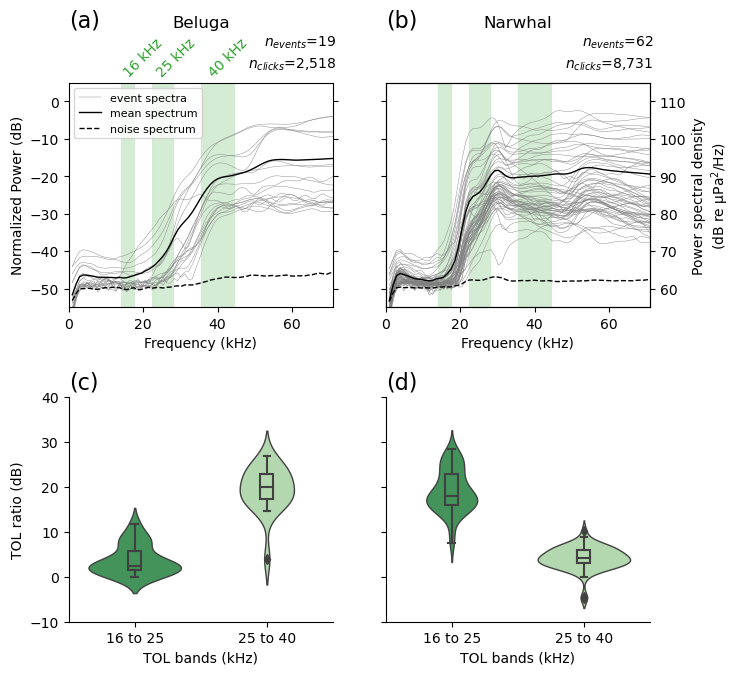

In [25]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species
spec_max = 110 # max is 107 dB, and 110 is nearest round number to correspond to primary y-axis

## beluga events
for i in range(1,len(beluga_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[0,:]-spec_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_reson/1000,beluga_reson_avSpec_all-spec_max,'k', linewidth=1,label='mean spectrum')
ax1.yaxis.set_ticks_position('both')
ax1.set_ylabel("Normalized Power (dB)")

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,narwhal_reson_avSpec_all-spec_max,'k', linewidth=1)

## add mean noise spectra to top two plots
ax1.plot(freq_array_reson/1000,beluga_reson_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='upper left',fontsize=8)
ax2.plot(freq_array_reson/1000,narwhal_reson_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed')

# add second axis with different units, update it whenever ax1 changes
ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+spec_max, y2+spec_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")

## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_reson_mean['band'],y=df_beluga_reson_mean['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_reson_mean, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax3)

ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_reson_mean['band'],y=df_narwhal_reson_mean['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_reson_mean, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-55,5)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:green',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("TOL bands (kHz)")
    ax.set_ylim(-10,40)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax2.text(72,16,'$\it{n}_{events}$=' + str(len(narwhal_2013_spec_0kHz['eventId'])), ha='right', va='center')
ax1.text(72,16,'$\it{n}_{events}$=' + str(len(beluga_2013_spec_0kHz['eventId'])),  ha='right', va='center')

ax2.text(72,10,'$\it{n}_{clicks}$=' + f"{narwhal_2013_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
ax1.text(72,10,'$\it{n}_{clicks}$=' + f"{beluga_2013_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,6,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(23,6,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(37,6,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:green');

ax2.set_title('Narwhal',pad=40)
ax1.set_title('Beluga',pad=40);

# ## add misclassified events in red
# ax1.plot(freq_array_reson/1000,np.array(misclass_bel)[0],color='r',linewidth=0.5);

# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_1)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_2)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_3)[0],color='r',linewidth=0.5);

# plt.savefig('figures/spl_diff_fig_reson.png', bbox_inches='tight', dpi=300, facecolor='white')

Sum TOL results

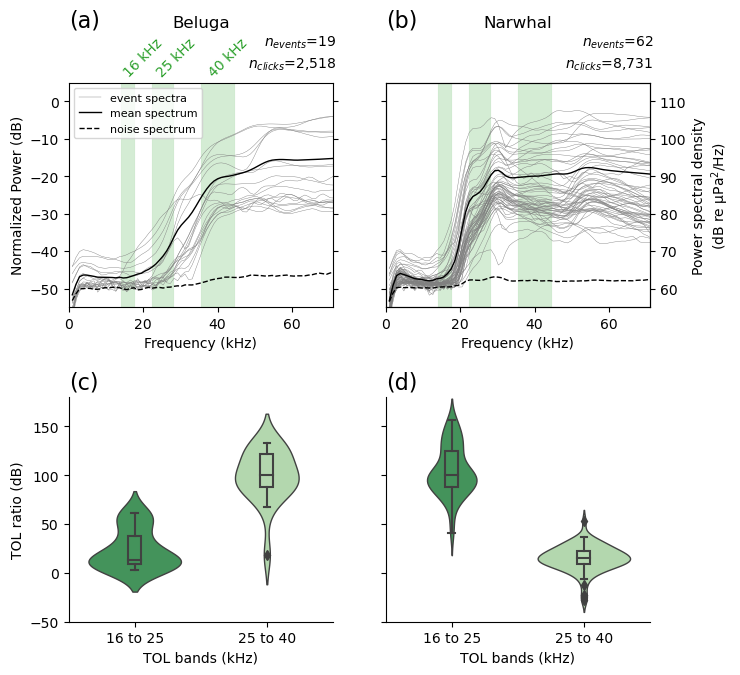

In [32]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species
spec_max = 110 # max is 107 dB, and 110 is nearest round number to correspond to primary y-axis

## beluga events
for i in range(1,len(beluga_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[0,:]-spec_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_reson/1000,beluga_reson_avSpec_all-spec_max,'k', linewidth=1,label='mean spectrum')
ax1.yaxis.set_ticks_position('both')
ax1.set_ylabel("Normalized Power (dB)")

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,narwhal_reson_avSpec_all-spec_max,'k', linewidth=1)

## add mean noise spectra to top two plots
ax1.plot(freq_array_reson/1000,beluga_reson_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='upper left',fontsize=8)
ax2.plot(freq_array_reson/1000,narwhal_reson_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed')

# add second axis with different units, update it whenever ax1 changes
ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+spec_max, y2+spec_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")

## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_reson_sum['band'],y=df_beluga_reson_sum['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_reson_sum, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax3)

ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_reson_sum['band'],y=df_narwhal_reson_sum['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_reson_sum, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-55,5)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:green',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("TOL bands (kHz)")
    ax.set_ylim(-50,180)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax2.text(72,16,'$\it{n}_{events}$=' + str(len(narwhal_2013_spec_0kHz['eventId'])), ha='right', va='center')
ax1.text(72,16,'$\it{n}_{events}$=' + str(len(beluga_2013_spec_0kHz['eventId'])),  ha='right', va='center')

ax2.text(72,10,'$\it{n}_{clicks}$=' + f"{narwhal_2013_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
ax1.text(72,10,'$\it{n}_{clicks}$=' + f"{beluga_2013_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,6,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(23,6,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(37,6,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:green');

ax2.set_title('Narwhal',pad=40)
ax1.set_title('Beluga',pad=40);

# ## add misclassified events in red
# ax1.plot(freq_array_reson/1000,np.array(misclass_bel)[0],color='r',linewidth=0.5);

# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_1)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_2)[0],color='r',linewidth=0.5)
# ax2.plot(freq_array_reson/1000,np.array(misclass_nar_3)[0],color='r',linewidth=0.5);

# plt.savefig('figures/spl_diff_fig_reson.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot SoundTrap data

TOL calculated using mean within frequency bands

In [34]:
## identify maximum of rows and columns
beluga_ST_max = (beluga_ST_avSpec.iloc[:,0:72]).max().max()
narwhal_ST_max = (narwhal_ST_avSpec.iloc[:,0:72]).max().max()
spec_max = max([beluga_ST_max, narwhal_ST_max]) # max between species' spectra
spec_max

75.82039396102692

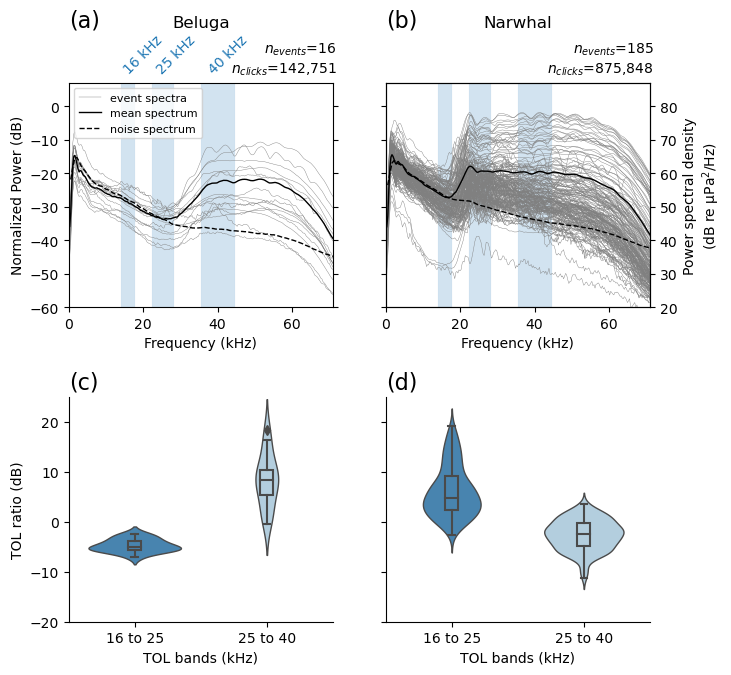

In [46]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species
spec_max = 80 # max is 75.8 dB, and 80 is nearest round number to correspond to primary y-axis

## beluga events
for i in range(1,len(beluga_ST_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[0,:]-spec_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_soundtrap/1000,beluga_ST_avSpec_all-spec_max,'k', linewidth=1,label='mean spectrum')
ax1.yaxis.set_ticks_position('both')
ax1.set_ylabel("Normalized Power (dB)")

## narwhal events
for i in range(len(narwhal_ST_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, narwhal_ST_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,narwhal_ST_avSpec_all-spec_max,'k', linewidth=1)

# add mean noise spectra to top two plots
ax2.plot(freq_array_soundtrap_256/1000,narwhal_ST_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed')
ax1.plot(freq_array_soundtrap_256/1000,beluga_ST_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='upper left',fontsize=8)

# add second axis with different units, update it whenever ax1 changes
ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+spec_max, y2+spec_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_ST_mean['band'],y=df_beluga_ST_mean['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_ST_mean, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency band (kHz)");

sns.violinplot(x=df_narwhal_ST_mean['band'],y=df_narwhal_ST_mean['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.6,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_ST_mean, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-60,7)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:blue',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("TOL bands (kHz)")
    ax.set_ylim(-20,25)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax2.text(72,17,'$\it{n}_{events}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='right', va='center')
ax1.text(72,17,'$\it{n}_{events}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='right', va='center')

ax2.text(72,11,'$\it{n}_{clicks}$=' + f"{narwhal_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
ax1.text(72,11,'$\it{n}_{clicks}$=' + f"{beluga_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,9,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(23,9,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(37,9,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');

ax1.set_title('Beluga',pad=40)
ax2.set_title('Narwhal',pad=40);

## add misclassified events in red
# ax2.plot(freq_array_soundtrap/1000,np.array(misclass_nar_ST)[0],color='r',linewidth=0.5)

plt.savefig('figures/TOL_ratios_mean_soundtrap.png', bbox_inches='tight', dpi=300, facecolor='white')

TOL calculated using sum within frequency bands

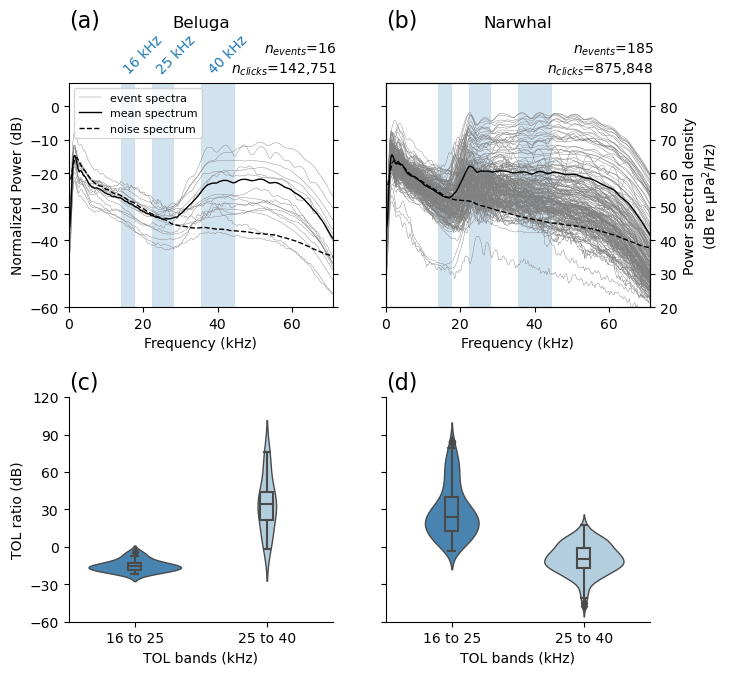

In [48]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: PSD for each species
spec_max = 80 # max is 75.8 dB, and 80 is nearest round number to correspond to primary y-axis

## beluga events
for i in range(1,len(beluga_ST_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[0,:]-spec_max,'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_soundtrap/1000,beluga_ST_avSpec_all-spec_max,'k', linewidth=1,label='mean spectrum')
ax1.yaxis.set_ticks_position('both')
ax1.set_ylabel("Normalized Power (dB)")

## narwhal events
for i in range(len(narwhal_ST_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, narwhal_ST_avSpec.iloc[i,:]-spec_max,'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,narwhal_ST_avSpec_all-spec_max,'k', linewidth=1)

# add mean noise spectra to top two plots
ax2.plot(freq_array_soundtrap_256/1000,narwhal_ST_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed')
ax1.plot(freq_array_soundtrap_256/1000,beluga_ST_noise_spec_all-spec_max,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='upper left',fontsize=8)

# add second axis with different units, update it whenever ax1 changes
ax2_twin = ax2.twinx()
def convert_ax2_twin(ax2):
    y1, y2 = ax2.get_ylim()
    ax2_twin.set_ylim(y1+spec_max, y2+spec_max)
    ax2_twin.figure.canvas.draw()    
ax2.callbacks.connect("ylim_changed", convert_ax2_twin)
ax2_twin.set_ylabel("Power spectral density\n(dB re µPa$^2$/Hz)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_ST_sum['band'],y=df_beluga_ST_sum['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_ST_sum, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("TOL ratio (dB)")
ax3.set_xlabel("Frequency band (kHz)");

sns.violinplot(x=df_narwhal_ST_sum['band'],y=df_narwhal_ST_sum['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.6,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_ST_sum, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    # ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(-60,7)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:blue',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("TOL bands (kHz)")
    ax.set_ylim(-60,120)
    ax.set_yticks([-60,-30,0,30,60,90,120])

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax2.text(72,17,'$\it{n}_{events}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='right', va='center')
ax1.text(72,17,'$\it{n}_{events}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='right', va='center')

ax2.text(72,11,'$\it{n}_{clicks}$=' + f"{narwhal_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
ax1.text(72,11,'$\it{n}_{clicks}$=' + f"{beluga_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,9,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(23,9,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(37,9,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');

ax1.set_title('Beluga',pad=40)
ax2.set_title('Narwhal',pad=40);

## add misclassified events in red
# ax2.plot(freq_array_soundtrap/1000,np.array(misclass_nar_ST)[0],color='r',linewidth=0.5)

plt.savefig('figures/TOL_ratios_sum_soundtrap.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot misclassified events

Extract data for events that were misclassified by third-octave RF model

In [14]:
## look at beluga event that was misclassified by TOL RF model - Reson
misclass_bel = beluga_2013_spec_0kHz[beluga_2013_spec_0kHz['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE84'].loc[:,'X1':'X256'] + 206
misclass_bel_spl = df_beluga_reson[df_beluga_reson['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE84']

## look at narwhal events that were misclassified by TOL RF model - Reson
misclass_nar_1 = narwhal_2013_spec_0kHz[narwhal_2013_spec_0kHz['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE16'].loc[:,'X1':'X256'] + 206
misclass_nar_2 = narwhal_2013_spec_0kHz[narwhal_2013_spec_0kHz['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE8'].loc[:,'X1':'X256'] + 206
misclass_nar_3 = narwhal_2013_spec_0kHz[narwhal_2013_spec_0kHz['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE35'].loc[:,'X1':'X256'] + 206

misclass_nar_spl_1 = df_narwhal_reson[df_narwhal_reson['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE16']
misclass_nar_spl_2 = df_narwhal_reson[df_narwhal_reson['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE8']
misclass_nar_spl_3 = df_narwhal_reson[df_narwhal_reson['eventId']=='PAM20103_Zahn_narluga-ECdetection.OE35']

## look at narwhal events that were misclassified by TOL RF model - SoundTrap
misclass_nar_ST = narwhal_spec_0kHz[narwhal_spec_0kHz['eventId']==757].loc[:,'X1':'X256'] + 173
misclass_nar_ST_spl = df_narwhal_ST[df_narwhal_ST['eventId']==757]

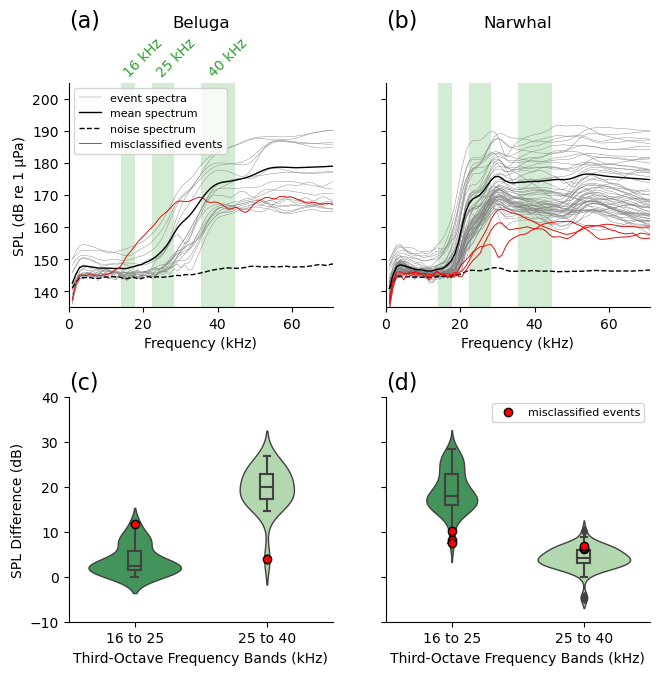

In [15]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: mean power spectra for each species

## beluga events
for i in range(1,len(beluga_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[0,:],'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("SPL (dB re 1 μPa)")

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## add mean noise spectra to top two plots
ax1.plot(freq_array_reson/1000,beluga_reson_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax2.plot(freq_array_reson/1000,narwhal_reson_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed')

## bottom two panels: SPL difference between two frequency bands
## add misclassified points to plots
ax3.scatter(misclass_bel_spl.band,misclass_bel_spl.dB,color='r',edgecolor='k',zorder=4);
ax4.scatter(misclass_nar_spl_1.band,misclass_nar_spl_1.dB,color='r',edgecolor='k',zorder=4);
ax4.scatter(misclass_nar_spl_2.band,misclass_nar_spl_2.dB,color='r',edgecolor='k',zorder=4);
ax4.scatter(misclass_nar_spl_3.band,misclass_nar_spl_3.dB,color='r',edgecolor='k',zorder=4,label='misclassified events');

sns.violinplot(x=df_beluga_reson['band'],y=df_beluga_reson['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_reson, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax3)

ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_reson['band'],y=df_narwhal_reson['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_reson, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(135,205)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:green',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("Third-Octave Frequency Bands (kHz)")
    ax.set_ylim(-10,40)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# # add sample size number in upper right of each plot
# ax2.text(72,203,'$\it{n}_{events}$=' + str(len(narwhal_2013_spec_0kHz['eventId'])), ha='right', va='center')
# ax1.text(72,203,'$\it{n}_{events}$=' + str(len(beluga_2013_spec_0kHz['eventId'])),  ha='right', va='center')

# ax2.text(72,210,'$\it{n}_{clicks}$=' + f"{narwhal_2013_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
# ax1.text(72,210,'$\it{n}_{clicks}$=' + f"{beluga_2013_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,206,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(23,206,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(37,206,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:green');

ax2.set_title('Narwhal',pad=40)
ax1.set_title('Beluga',pad=40);

## add misclassified events in red
ax1.plot(freq_array_reson/1000,np.array(misclass_bel)[0],color='r',linewidth=0.6,label='misclassified events');

ax2.plot(freq_array_reson/1000,np.array(misclass_nar_1)[0],color='r',linewidth=0.6)
ax2.plot(freq_array_reson/1000,np.array(misclass_nar_2)[0],color='r',linewidth=0.6)
ax2.plot(freq_array_reson/1000,np.array(misclass_nar_3)[0],color='r',linewidth=0.6);

ax1.legend(loc='upper left',fontsize=8);
ax4.legend(loc='upper right',fontsize=8)

plt.savefig('figures/spl_diff_fig_reson_misclass.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot SoundTrap data

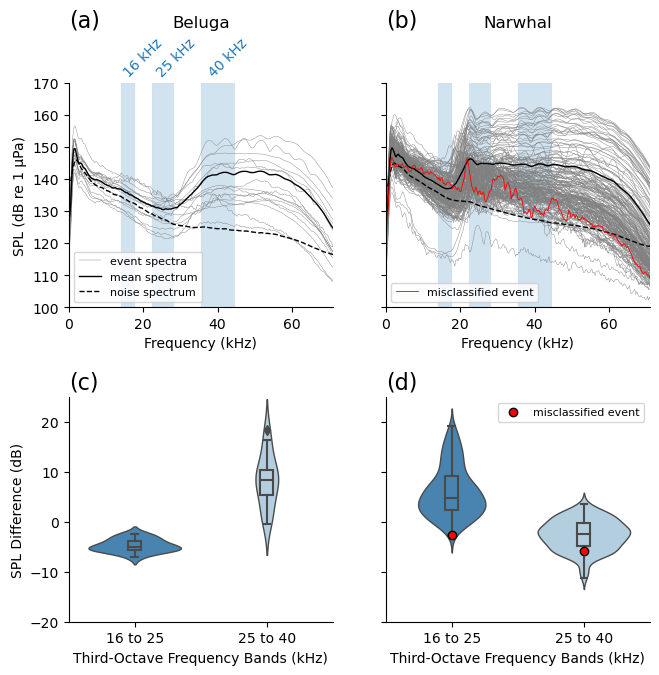

In [16]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: mean power spectra for each species

## beluga events
for i in range(1,len(beluga_ST_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[i,:],'gray',linewidth=0.3)
# plot one for legend
ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[0,:],'gray',linewidth=0.3,label='event spectra')
ax1.plot(freq_array_soundtrap/1000,beluga_ST_avSpec_all,'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("SPL (dB re 1 μPa)")

## narwhal events
for i in range(len(narwhal_ST_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, narwhal_ST_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,narwhal_ST_avSpec_all,'k', linewidth=1)

## add mean noise spectra to top two plots
ax2.plot(freq_array_soundtrap_256/1000,narwhal_ST_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed')
ax1.plot(freq_array_soundtrap_256/1000,beluga_ST_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
    
## bottom two panels: SPL difference between two frequency bands
## add misclassified points to plots
ax4.scatter(misclass_nar_ST_spl.band,misclass_nar_ST_spl.dB,color='r',edgecolor='k',zorder=4,label='misclassified event');

sns.violinplot(x=df_beluga_ST['band'],y=df_beluga_ST['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_ST, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_ST['band'],y=df_narwhal_ST['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_ST, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(100,170)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:blue',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("Third-Octave Frequency Bands (kHz)")
    ax.set_ylim(-20,25)

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
# ax2.text(72,168,'$\it{n}_{events}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='right', va='center')
# ax1.text(72,168,'$\it{n}_{events}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='right', va='center')

# ax2.text(72,174,'$\it{n}_{clicks}$=' + f"{narwhal_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
# ax1.text(72,174,'$\it{n}_{clicks}$=' + f"{beluga_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,171,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(23,171,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(37,171,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');

ax1.set_title('Beluga',pad=40)
ax2.set_title('Narwhal',pad=40);

## add misclassified events in red
ax2.plot(freq_array_soundtrap/1000,np.array(misclass_nar_ST)[0],color='r',linewidth=0.6,label='misclassified event')

ax1.legend(loc='lower left',fontsize=8)
ax2.legend(loc='lower left',fontsize=8)
ax4.legend(loc='upper right',fontsize=8)

plt.savefig('figures/spl_diff_fig_soundtrap_misclass.png', bbox_inches='tight', dpi=300, facecolor='white')

### Sampling rate figure for presentations

NameError: name 'narwhal_2013_spec_10kHz' is not defined

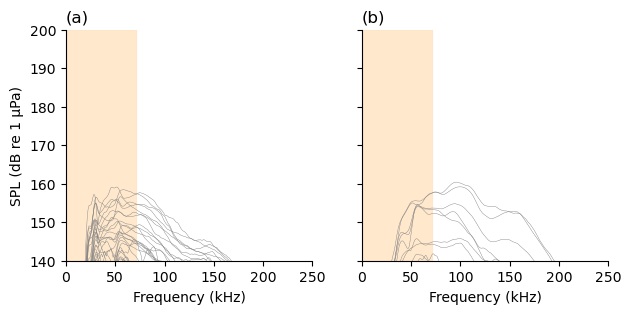

In [38]:
plt.rcParams['figure.figsize'] = (7,3)
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(140,200)
    ax.set_xlim(0,250)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(0, 72, alpha=0.2, color='darkorange',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,40)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(248,198,'$\it{n}$=' + str(len(narwhal_2013_spec_10kHz['eventId'])), ha='right', va='center')
ax2.text(248,198,'$\it{n}$=' + str(len(beluga_2013_spec_10kHz['eventId'])),  ha='right', va='center')

# add frequency band numbers
ax1.text(75,198,'0-72 kHz', ha='left', va='center',color='darkorange');

# plt.savefig('figures/spl_diff_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

### Compute difference between TOL ratios

In [5]:
## SoundTrap 16 to 25 kHz minus 25 to 40 kHz
narwhal_soundtrap_spl_compare = narwhal_soundtrap_spec["TOL_16to25_mean_dB"] - narwhal_soundtrap_spec["TOL_25to40_mean_dB"]
beluga_soundtrap_spl_compare = beluga_soundtrap_spec["TOL_16to25_mean_dB"] - beluga_soundtrap_spec["TOL_25to40_mean_dB"]

narwhal_reson_spl_compare = narwhal_reson_spec["TOL_16to25_mean_dB"] - narwhal_reson_spec["TOL_25to40_mean_dB"]
beluga_reson_spl_compare = beluga_reson_spec["TOL_16to25_mean_dB"] - beluga_reson_spec["TOL_25to40_mean_dB"]

In [6]:
## pool observations
narwhal_spl_compare = pd.concat([narwhal_soundtrap_spl_compare,narwhal_reson_spl_compare])
beluga_spl_compare = pd.concat([beluga_soundtrap_spl_compare,beluga_reson_spl_compare])

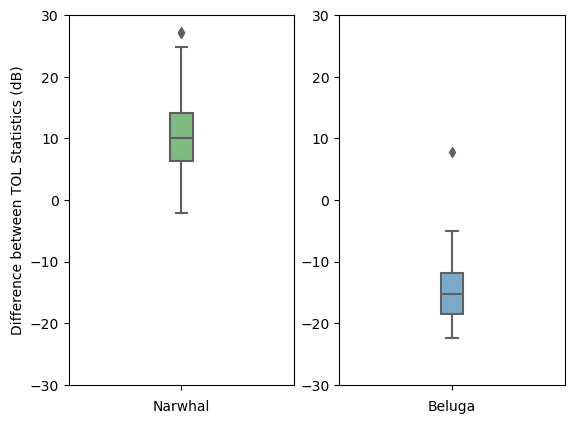

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(y=narwhal_spl_compare, width=0.1,palette='Greens_r',ax=ax1)
sns.boxplot(y=beluga_spl_compare, width=0.1,palette='Blues_r',ax=ax2)

ax1.set_xlabel("Narwhal")
ax1.set_ylabel("Difference between TOL Statistics (dB)")
ax2.set_xlabel("Beluga")

ax1.set_ylim(-30,30)
ax2.set_ylim(-30,30);

## Plot example mean spectra

In [28]:
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/ex_spec/'

In [29]:
narwhal_ex_spec = pd.read_csv(csv_dir + 'narwhal_ex_spec.csv')
beluga_ex_spec = pd.read_csv(csv_dir + 'beluga_ex_spec.csv')
narwhal_ex_spec_noise = pd.read_csv(csv_dir + 'narwhal_ex_spec_noise.csv')
beluga_ex_spec_noise = pd.read_csv(csv_dir + 'beluga_ex_spec_noise.csv')

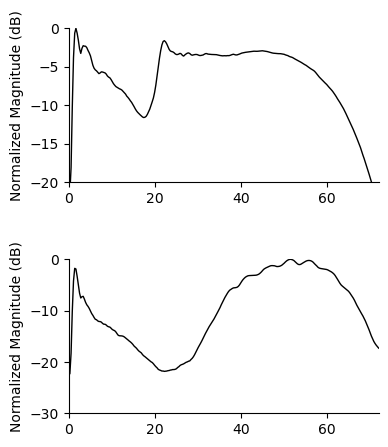

In [57]:
plt.rcParams['figure.figsize'] = (4,5)
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
## narwhal event
ax1.plot(narwhal_ex_spec.freq/1000,(narwhal_ex_spec.avgSpec-narwhal_ex_spec.avgSpec.max()),'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("Normalized Magnitude (dB)")
ax1.set_xlim(0,72)
ax1.set_ylim(-20,0)
ax1.spines[['right', 'top']].set_visible(False)

ax2.plot(beluga_ex_spec.freq/1000,beluga_ex_spec.avgSpec,'k', linewidth=1,label='mean spectrum')
ax2.set_ylabel("Normalized Magnitude (dB)")
ax2.set_xlim(0,72)
ax2.set_ylim(-30,0)
ax2.spines[['right', 'top']].set_visible(False)

plt.savefig('figures/whale_ex_spec.png', bbox_inches='tight', dpi=300, facecolor='white')